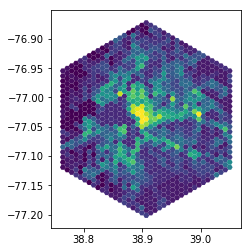

In [3]:
import pandas as pd
import folium
import fiona
import geopandas as gpd
import requests
import numpy as np
from bs4 import BeautifulSoup
from pandas.io.json import json_normalize
from shapely.geometry import Polygon
from math import pi, sin, cos
from geojson import GeoJSON

hex_frame=pd.read_pickle('hex_pickle')
hex_frame.plot(column='score')

In [2]:

washington_x = 38.904978
washginton_y = -77.039658

washington_boundaries = (
(washington_x-0.15, washginton_y-0.15),
(washington_x+0.15, washginton_y+0.15)
)

washington = folium.Map()
washington.fit_bounds(washington_boundaries)

hex_frame.crs = {'init': 'epsg:3857'}

hex_json = hex_frame[['geometry','index1']].to_json()
values = hex_frame[['geometry','score','index1']]

washington.choropleth(geo_data=hex_json,
                data=values,
                columns=['index1', 'score'],
                key_on='feature.id',
    fill_opacity=0.7, line_opacity=0.2,
                fill_color='YlGn')

folium.GeoJson(hex_json
              ).add_to(washington)
washington